# Part 2.2: Prediction Using Gradient Descent

In [1]:
# Run the common codes to import modules, get data and pre-defined loss functions
%run Part0.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1061 non-null   object  
 1   selling_price      1061 non-null   int64   
 2   year               1061 non-null   int64   
 3   seller_type        1061 non-null   category
 4   owner              1061 non-null   int32   
 5   km_driven          1061 non-null   int64   
 6   ex_showroom_price  626 non-null    float64 
dtypes: category(1), float64(1), int32(1), int64(3), object(1)
memory usage: 46.9+ KB
None
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  I

In [2]:
# the dataframe
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,NaN
1,Honda Dio,45000,2017,Individual,1,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,NaN


In [3]:
# the loss function
x = [34, 37, 44, 47, 48, 48, 46, 43, 32, 27, 26, 24]
y = [37, 40, 46, 44, 46, 50, 45, 44, 34, 30, 22, 23]

loss(x, y)

2.4324199198877374

## Define helper functions
Before we start the grid search, it will be convinient if we first define the following functions:
1. The slope function to calculate the slope of the loss function
2. The gradient descent function to search the optimal parameters

In [4]:
# calculate a slope of the loss function
## obs: observations (pandas series)
## var_x: variable (regressor) used for prediction (pandas series)
## vec_b: parameter vector of the starting point (list of b0 and b1)
## vec_delta: delta of parameter vector (list of steps for b0 and b1)
def slope(obs, var_x, vec_b, vec_delta):    
    # distance between two points (current b and new b)
    dist = np.linalg.norm(vec_delta)
    
    if dist == 0:
        rate = 0
    else:             
        # starting point
        x0 = vec_b[0] + vec_b[1] * np.array(var_x)
        y0 = loss(obs, x0)
        
        # end point
        vec_b_new = np.add(vec_b, vec_delta)
        x1 = vec_b_new[0] + vec_b_new[1] * np.array(var_x)
        y1 = loss(obs, x1)              
        
        # the change rate (slope)
        rate = (y1 - y0)/dist
        pass
    
    return rate


In [5]:
# gradient descent function
## obs: observations (pandas series)
## var_x: variable (regressor) used for prediction (pandas series)
## lst_b0: initial b0 and its step size (list of b0 and delat_b0)
## lst_b1: initial b1 and its step size (list of b1 and delat_b1)
## tolerance: the search ending criteria 
## max_iter: maximum number of iteration
def GD(obs, var_x, lst_b0, lst_b1, tolerance = 0.001, max_iter = 2000):
    # initialize a list to save seach history
    hist = []
    
    # initialize the starting point and distance
    vec_b = [lst_b0[0], lst_b1[0]]
    delta_b0, delta_b1 = np.abs(lst_b0[1]), np.abs(lst_b1[1])
    dist = tolerance  
    
    for i in range(max_iter):
        # along b0 axis
        slope_b0 = slope(obs, var_x, vec_b, [tolerance, 0])   
        b0_new = vec_b[0] - slope_b0 * delta_b0
        
        # along b1 axis
        slope_b1 = slope(obs, var_x, vec_b, [0, tolerance**2])        
        b1_new = vec_b[1] - slope_b1 * delta_b1  
    
        # distance
        dist = np.linalg.norm(np.subtract(vec_b, [b0_new, b1_new]))
        
        # update b0, b1 and append it to the search history
        vec_b = [b0_new, b1_new]
        hist.append(vec_b)
        
        # exit the loop if the results meets the requirement
        if dist < tolerance:
            break
        pass  
    
    # return the search history of [b0, b1]
    return hist

## Task 1: Just $y$
The model we will first try is: $\hat{y}_i = \beta_0 + \beta_1 x_i$ with $\beta_1 = 0$.

In this case, we only use $\beta_0$ to predict the selling price. 
- Initial values for $\beta_0$: In order to show our algorithm works, we arbitarily choose the initial value 0 and step size of 1000. 
- Initial values for $\beta_1$: The initial value is 0 (we are not using it in this model) and set the step size to 0 so that we are not change its value.

In [6]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 0]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

789 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[59638.08612432331, 0.0],
 [59638.08728120057, 0.0],
 [59638.08841624996, 0.0],
 [59638.08952947147, 0.0],
 [59638.09062814107, 0.0],
 [59638.0917049828, 0.0],
 [59638.09276727261, 0.0],
 [59638.09380773455, 0.0],
 [59638.094826368615, 0.0],
 [59638.09582317481, 0.0]]

After 788 iterations, we get a convergent result. 
- $\beta_0 = 59638.09582317481$

This is close to the mean of the selling price $59638.151744$ as expected.

## Task 2: Using $y$ and another numeric variable $x$
Now we will fit the model $\hat{y}_i = \beta_0 + \beta_1 x_i$.

In this case, we only use $\beta_0$ to predict the selling price. 
- Initial values for $\beta_0$: We arbitarily choose the initial value 0 and step size of 1000. 
- Initial values for $\beta_1$: 

### Attempt 1

In [7]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

2000 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811],
 [1093.511178623885, 17937388.867721893],
 [605.2299286238849, -44074329.88227811]]

The iteration number reaches the maximum setting and we don't get convergent result.

From the search history, the values of [$\beta_0$, $\beta_1$] change between two points ([605, -44074329] and [1093, 17937388]). This implies at least one of the step sizes we used is too big. 

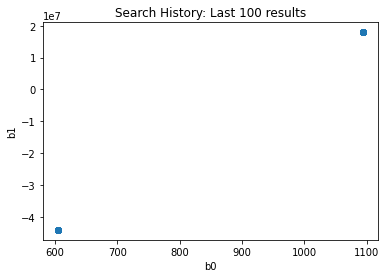

In [8]:
# plot the search history
x, y = np.array(hist[-100:]).T
plt.scatter(x, y, )
plt.title("Search History: Last 100 results")
plt.xlabel("b0")
plt.ylabel("b1")

plt.show()

Since, in the Task 1, we can get a convergent result with step size 1000 for $\beta_0$, we will try to use a smaller step size (1000 time smaller) for $\beta_1$ in our next attempt.

### Attempt 2

In [9]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000 / 1000]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

2000 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998],
 [727.3002411238849, 17448.63078056369],
 [173.21546329185367, -44543.53764594998]]

The iteration number reaches the maximum setting and we don't get convergent result.

From the search history, the values of [$\beta_0$, $\beta_1$] change between two points. This implies at least one of the step sizes we used is too big. 

We will try to use a smaller step size (1000 time smaller again) for $\beta_1$ in our next attempt.

### Attempt 3

In [10]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000 / 1000**2]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

2000 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[35518.29530624673, 30.961704571382143],
 [34975.9177188389, -30.99899050721433],
 [35541.636345442384, 30.96180818101857],
 [34999.250376131386, -30.998895977973007],
 [35564.96085366234, 30.961911324993707],
 [35022.56626961753, -30.998802147223614],
 [35588.26836524531, 30.96201283915434],
 [35045.86493363604, -30.998710411950015],
 [35611.55911302194, 30.96211295633111],
 [35069.14706667885, -30.998619375168346]]

The iteration number reaches the maximum setting and we don't get convergent result.

From the search history, the values of [$\beta_0$, $\beta_1$] change between two points. This implies at least one of the step sizes we used is too big. 

We will try to use a smaller step size (1000 time smaller again) for $\beta_1$ in our next attempt.

### Attempt 4

In [11]:
# set up initial parameters
## lst_b0 = [initial b0, its step size]
## lst_b1 = [initial b1, its step size]
lst_b0 = [0, 1000]
lst_b1 = [0, 1000 / 1000 ** 3]

# perform gradient descent algorithm
hist = GD(df.selling_price, df.km_driven, lst_b0, lst_b1)

# print the results
print(f"{len(hist)} iterations completed. The last 10 sets of [b0, b1] in the search history:")
hist[-10:]

1187 iterations completed. The last 10 sets of [b0, b1] in the search history:


[[67618.00127424067, -0.23224530801235233],
 [67618.00236563431, -0.23224531971936813],
 [67618.00344247604, -0.23224533128086478],
 [67618.0045120418, -0.2322453427113942],
 [67618.00556705566, -0.2322453540036804],
 [67618.0066075176, -0.2322453651795513],
 [67618.00764070358, -0.23224537620990304],
 [67618.00865933765, -0.23224538712383946],
 [67618.0096634198, -0.23224539790680865],
 [67618.01066022599, -0.23224540856608655]]

After 1186 iterations, we get convergent results:
- $\beta_0 = 67618.01066022599$
- $\beta_1 = -0.23224540856608655$

And these agree well with the simple linear regression:

In [12]:
# fit a simple linear regression model for comparison
slope, intercept, *_ = stats.linregress(df.km_driven, df.selling_price)
print(f"intercept (b0) = {intercept}, slope (b1) = {slope}")

intercept (b0) = 67618.07212024048, slope (b1) = -0.2322456088674644


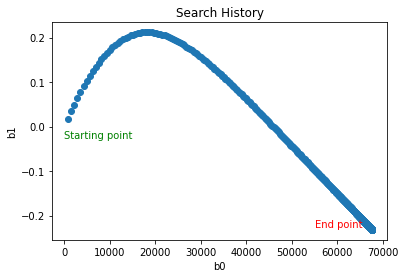

In [13]:
# plot the search history
x, y = np.array(hist).T
plt.scatter(x, y, )
plt.title("Search History")
plt.xlabel("b0")
plt.ylabel("b1")

plt.annotate("Starting point", xy =(0, -0.025), c = "green")
plt.annotate("End point", xy =(55000, -0.225), c = "red")

plt.show()

## Task 3: Predict Selling Prices

In [14]:
# get b0 and b1 from the last entry of the search history
b0, b1 = hist[-1]

# Use the model to predict the selling prices for the specified driven distances
[b0 + b1*x for x in [10000, 25000, 35000]]

[65295.556574565126, 61811.87544607383, 59489.42136041296]

- The predicted selling price for 10000 km driven distance is 65313.11968071168.
- The predicted selling price for 25000 km driven distance is 61818.6236917336.
- The predicted selling price for 35000 km driven distance is 59488.95969908155.